<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [1]:
import numpy as np
import math as mt
from math import factorial
import matplotlib.pyplot as plt


# funcion que calcula

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

In [2]:
def expo(x,N):

  n = 0
  e = 0
  while n <= N:
    e += ((-1) ** n) * ((x ** n) / mt.factorial(n))
    n+=1
  return e

x = int(input("ingrese el numero que desea calcular: "))
N = int(input("ingrese el numero de iteraciones que desea: "))

X = expo(x,N)
print(f"el error es de {X}")

ingrese el numero que desea calcular: 1000
ingrese el numero de iteraciones que desea: 100
el error es de 9.740196310795686e+141



\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [3]:
Z = abs((10e-7)*X)

B = abs(((-x)**N+1)/(mt.factorial(N+1)))

B <= Z

False

# Valores para $x\approx 10$ y $N\approx x-1$

In [4]:
X = expo(9.8,8.8) # valores para e^(-x), con x paroximadamente 1
print(f"el Error para x aprocimademente 10 y n aproximadamente x-1 es de: {X}")


el Error para x aprocimademente 10 y n aproximadamente x-1 es de: 1131.3000843835562


${1}/{e^x}$  , con x muy grande.

En e ste caso para x = 1000 y numero de iteraciones igual a 100

In [5]:
x = [100,1000,2000]

for i in x:
  z = 1/expo(i,100)  #valores para 1/e^(-x)
print(f"el Error para 1/e^(-x) con x = [100,1000,2000]  es: {z}")

el Error para 1/e^(-x) con x = [100,1000,2000]  es: 7.730422741831981e-173


# aumento de X de 1,10 y luego de 10,100 y los graficos

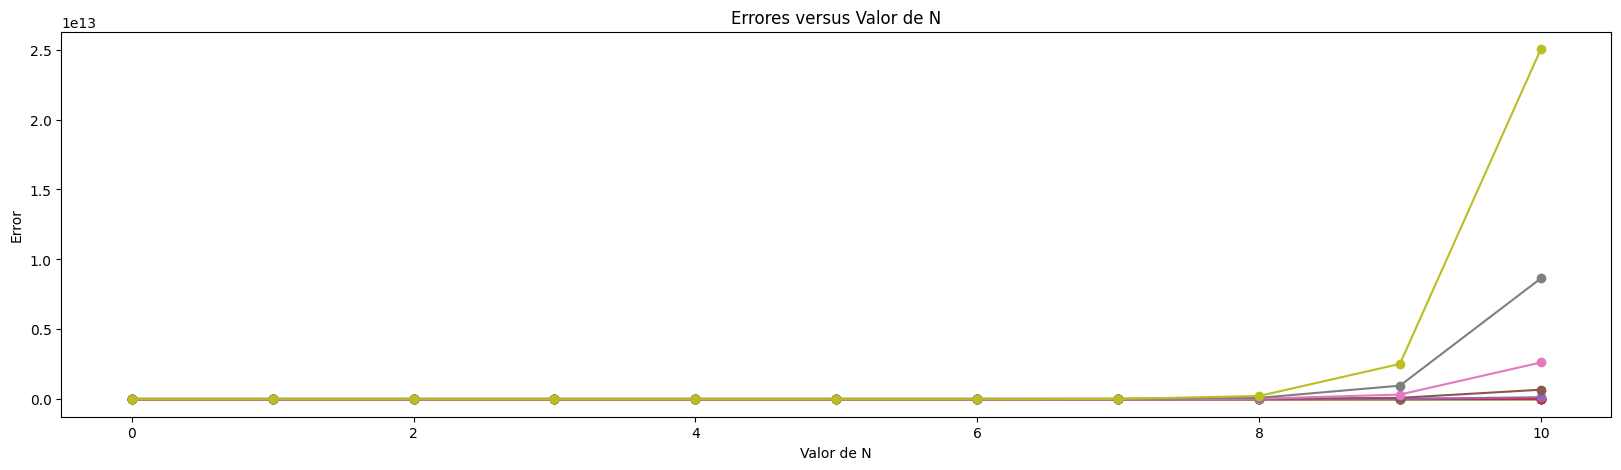

In [6]:


def expo(x, N):
    n = 0
    e = 0
    errors = []  # Lista para almacenar los errores

    while n <= N:
        e += ((-1) ** n) * ((x ** n) / mt.factorial(n))
        n += 1
        exact_value = mt.exp(-x)
        error = abs(e - exact_value)
        errors.append(error)  # Agregar el error a la lista

    return errors  # Devolver la lista de errores

# Valores de x para los que deseas calcular los errores
x_values = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
N = 10

plt.figure(figsize=(20, 5))

for x in x_values:
    errors = expo(x, N)
    n_values = list(range(N + 1))
    plt.plot(n_values, errors, marker='o')

plt.xlabel('Valor de N')
plt.ylabel('Error')
plt.title('Errores versus Valor de N')
plt.show()

# ***Cancelación Sustractiva***

\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

In [7]:
def sn1(N):

  n = 1
  e = 0
  while n <= N:
    e += ((-1) ** n) * ((n) / (n+1))
    n+=1
  return e

N = float(input("ingrese el numero de iteraciones que desea: "))

X1 = sn1(N)
print(f"el error es de {X1}")

ingrese el numero de iteraciones que desea: 100
el error es de 0.3019268305907944


# ***Sumando números pares e impares.***

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

In [8]:
def sn2(N):

  n = 1
  e = 0
  while n <= N:
    e1 = (2*n) / (2*n+1)
    e2 = (2*n-1) / (2*n)
    E = -e2 + e1
    e +=  E
    n+=1
  return e

N = float(input("ingrese el numero de iteraciones que desea: "))

X2 = sn2(N)
print(f"el error es de {X2}")

ingrese el numero de iteraciones que desea: 100
el error es de 0.30437144514006564


# ***Combinando las series de una forma analítica***

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}

In [9]:
def sn3(N):

  n = 1
  e = 0
  while n <= N:
    e += 1/((2*n)*((2*n)+1))
    n+=1
  return e

N = float(input("ingrese el numero de iteraciones que desea: "))

X3 = sn3(N)
print(f"el error es de {X3}")

ingrese el numero de iteraciones que desea: 10000
el error es de 0.3068278213149313


# ***Estos valores de convergencia representan el resultado al que se acercan las series a medida que N tiende a infinito. En este caso, los valores de convergencia son muy similares entre sí, lo que sugiere que las tres series convergen a un valor común.***

# ***Error Relativo***
* $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$

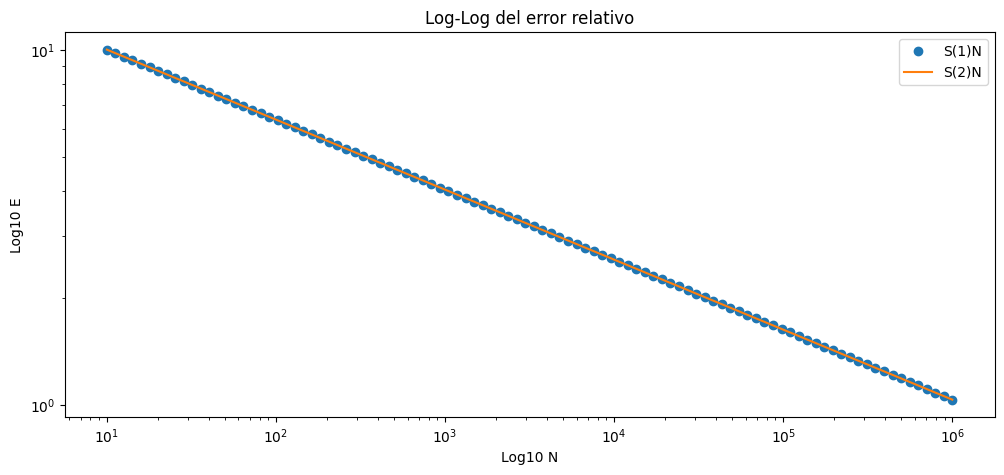

In [10]:

# Calculate ER1 and ER2 for a range of N values
N = np.logspace(1, 6, 100)

ER1 = np.abs((X1 - X3) / X3)
ER2 = np.abs((X2 - X3) / X3)
x1 = np.logspace(1, ER1, 100)
x2 = np.logspace(1, ER1, 100)
# Create a log-log plot

plt.figure(figsize=(12,5))
plt.loglog(N, x1, "o" ,label='S(1)N')
plt.loglog(N, x2, label='S(2)N')

# Labels and title
plt.xlabel('Log10 N')
plt.ylabel('Log10 E')
plt.title('Log-Log del error relativo')

# Legend
plt.legend()

# Show the plot
plt.show()